# El problema de Monty Hall
## Análisis de frecuencia de éxitos por estrategia de juego: no cambiar, cambiar, azar
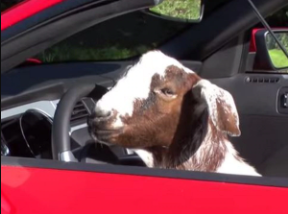

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Globals
SEED = 123456
RNG = np.random.default_rng(SEED)
DOORS = np.array([1,2,3])

# Success strategy hits counters
STAY_SUCCESS_COUNTER = 0
SWITCH_SUCCESS_COUNTER = 1
RANDOM_SUCCESS_COUNTER = 2

# Number of games to be simulated
MAX_GAMES = 10000

# Print game results if true
DEBUG = False


def chooseDoor(doors):
    return RNG.choice(doors)
    

## Simulación de N juegos

In [8]:
cumulativeResult = np.zeros((MAX_GAMES+1,3))

for game in range(MAX_GAMES):
    gameResult = np.zeros(3)
    
    # 1 - Game setup
    carDoor = chooseDoor(DOORS)
    goatDoors = DOORS[DOORS!=carDoor]

    # 2 - Player picks a door
    playerDoor = chooseDoor(DOORS)

    # 3 - Host opens a door with a goat from the ones that the player didn´t pick
    hintDoor = chooseDoor(goatDoors[goatDoors!=playerDoor])
    eligibleDoors = DOORS[DOORS!=hintDoor]

    # 4 - Decision making
    # Stay Strategy
    if (playerDoor == carDoor):
        gameResult[STAY_SUCCESS_COUNTER] = 1
    else:
    # Switch Strategy
        gameResult[SWITCH_SUCCESS_COUNTER] = 1
        
    # Random Strategy
    if (chooseDoor(eligibleDoors) == carDoor):
        gameResult[RANDOM_SUCCESS_COUNTER] = 1
    
    # Cumulative success hits per iteration
    cumulativeResult[game+1] = cumulativeResult[game] + gameResult

    if DEBUG:
        print('[LOG] game:',game+1, 'car door:',carDoor,'goat doors:',goatDoors,'player picked door:',playerDoor,'hint door:',hintDoor,'eligible doors:',eligibleDoors, 'result:', gameResult)
if DEBUG:
    print(cumulativeResult[1:,])
    

## Resultados por estrategia

Límite de frecuencias relativas sobre 10000 juegos
Probabilidad de éxito de no cambiar: 0.3311
Probabilidad de éxito de cambiar: 0.6689
Probabilidad de éxito de elegir al azar: 0.5013


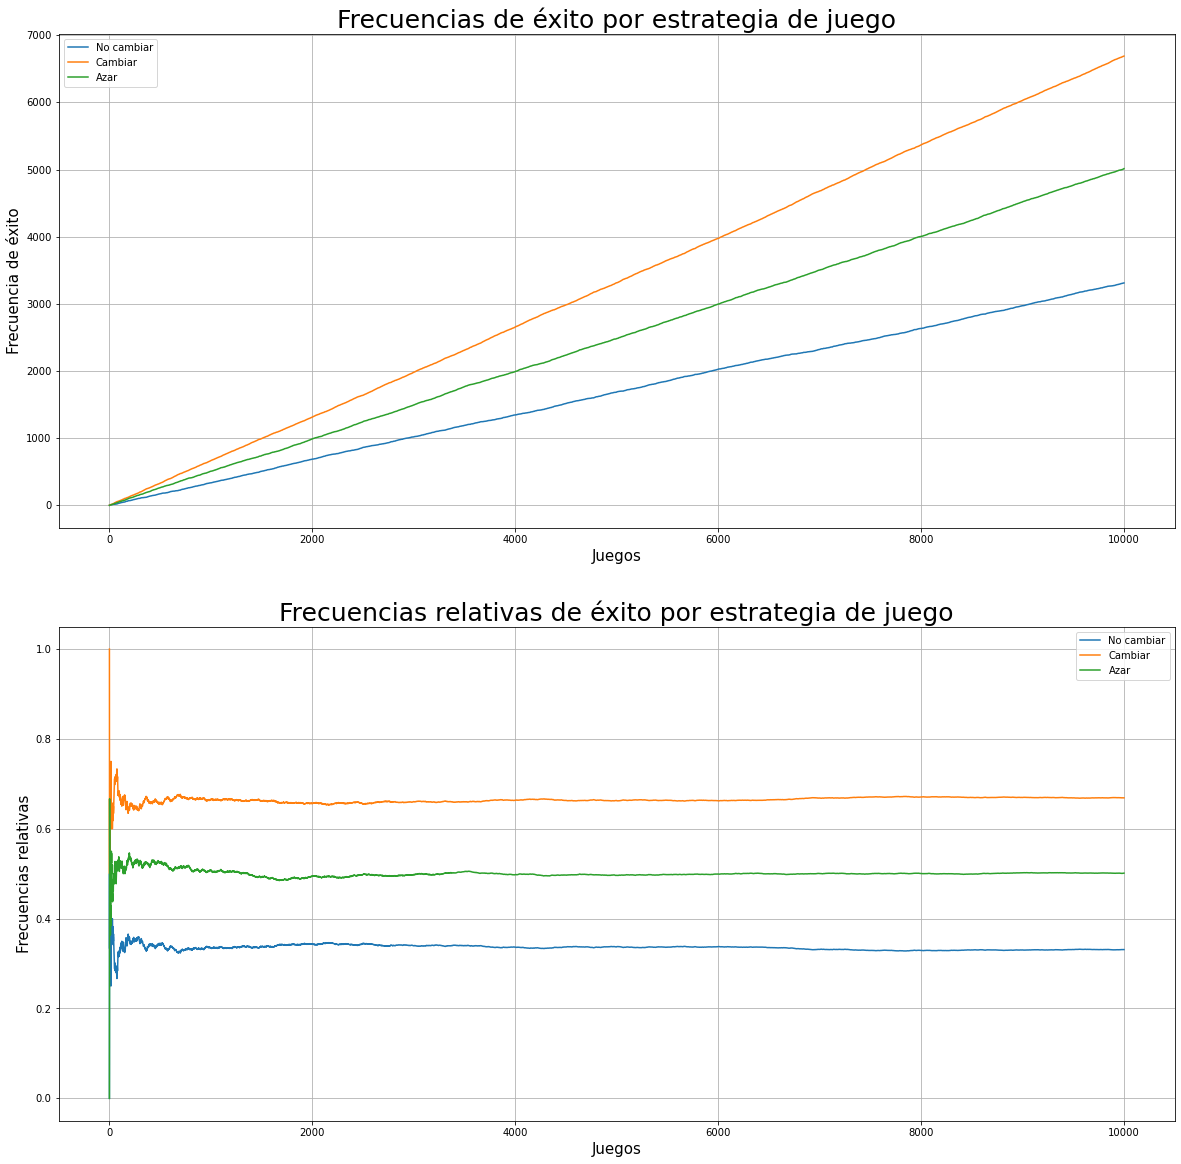

In [9]:
# Results
print('Límite de frecuencias relativas sobre', MAX_GAMES, 'juegos')
print('Probabilidad de éxito de no cambiar:', cumulativeResult[MAX_GAMES,STAY_SUCCESS_COUNTER]/MAX_GAMES)
print('Probabilidad de éxito de cambiar:', cumulativeResult[MAX_GAMES,SWITCH_SUCCESS_COUNTER]/MAX_GAMES)
print('Probabilidad de éxito de elegir al azar:', cumulativeResult[MAX_GAMES,RANDOM_SUCCESS_COUNTER]/MAX_GAMES)

%matplotlib inline
x = np.arange(start=1,stop=MAX_GAMES+1)
f = plt.figure(figsize=(20,20))

# Frequency of succesfull events graph
plt.subplot(2,1,1)
plt.plot(x, cumulativeResult[1:,STAY_SUCCESS_COUNTER], label = "No cambiar")
plt.plot(x, cumulativeResult[1:,SWITCH_SUCCESS_COUNTER], label = "Cambiar")
plt.plot(x, cumulativeResult[1:,RANDOM_SUCCESS_COUNTER], label = "Azar")
plt.title('Frecuencias de éxito por estrategia de juego', size=25)
plt.xlabel('Juegos', size=15)
plt.ylabel('Frecuencia de éxito', size=15)
plt.legend()
plt.grid()

# Relative frequencies graph
plt.subplot(2,1,2)
plt.plot(x, np.divide(cumulativeResult[1:,STAY_SUCCESS_COUNTER],x), label = "No cambiar")
plt.plot(x, np.divide(cumulativeResult[1:,SWITCH_SUCCESS_COUNTER],x), label = "Cambiar")
plt.plot(x, np.divide(cumulativeResult[1:,RANDOM_SUCCESS_COUNTER],x), label = "Azar")
plt.title('Frecuencias relativas de éxito por estrategia de juego', size=25)
plt.xlabel('Juegos', size=15)
plt.ylabel('Frecuencias relativas', size=15)
plt.legend()
plt.grid()

plt.show()